In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',200)
import warnings
warnings.filterwarnings('ignore')

In [41]:
previous = pd.read_csv(r"previous_app.csv")


In [42]:
previous.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
previous.shape

(1670214, 37)

In [44]:
previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [45]:
cl = previous.loc[:,list((100*(previous.isnull().sum()/len(previous.index)) >= 60))].columns
previous = previous.drop(cl, axis=1)
previous.shape

(1670214, 35)

In [46]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY     

In [47]:
def unnivariate_cat(variable):
    plt.figure(figsize=(12,6))
    sns.countplot(variable, data=previous, palette= 'bright', order= previous[variable].value_counts().index)
    plt.title('Analysis of '+ '%s' %variable, weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Clients')
    plt.show()

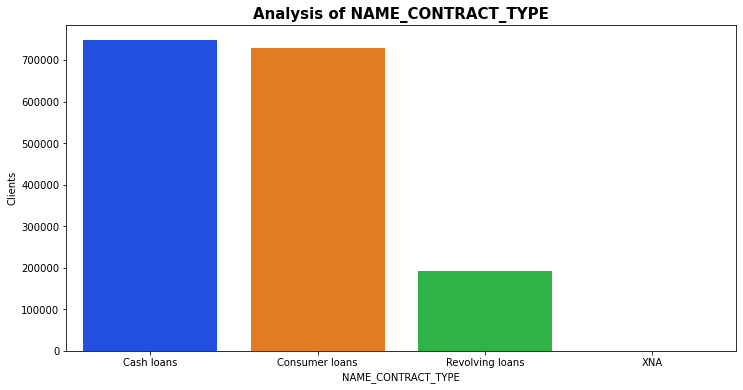

In [48]:
unnivariate_cat('NAME_CONTRACT_TYPE')

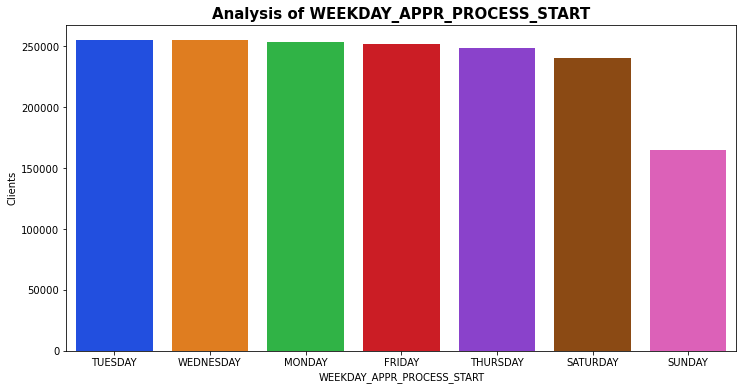

In [49]:
unnivariate_cat('WEEKDAY_APPR_PROCESS_START')

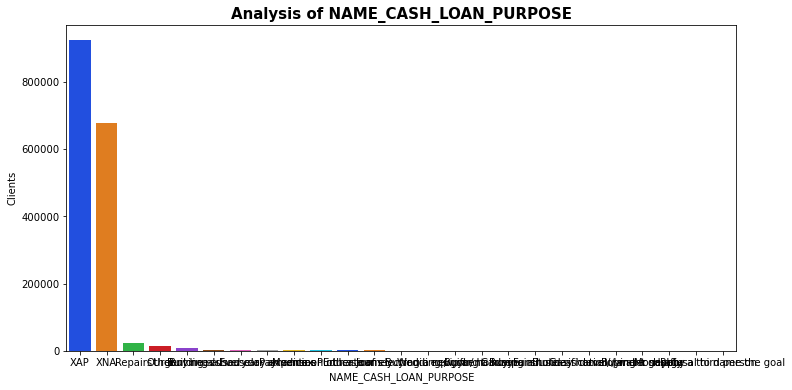

In [50]:
unnivariate_cat('NAME_CASH_LOAN_PURPOSE')

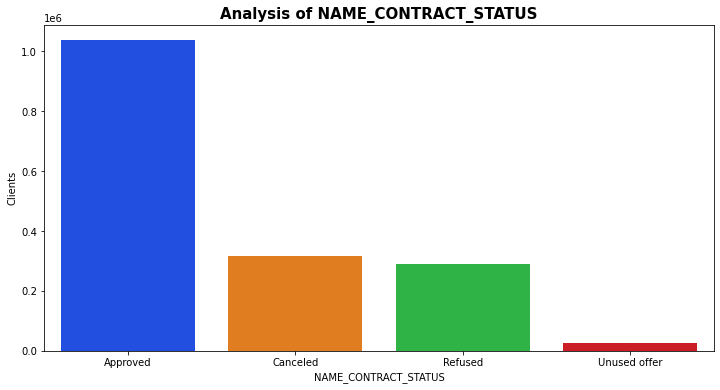

In [51]:
unnivariate_cat('NAME_CONTRACT_STATUS')

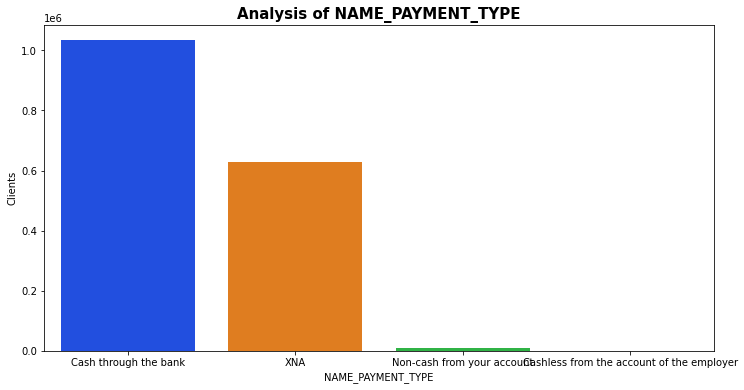

In [52]:
unnivariate_cat('NAME_PAYMENT_TYPE')

In [53]:
def unnivariate_cont(variable):
    plt.figure(figsize=(12,6))
    sns.distplot(previous[variable],color='tab:blue')
    plt.title('Distribution of '+ '%s' %variable, weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Normal distribution for clients')
    plt.show()

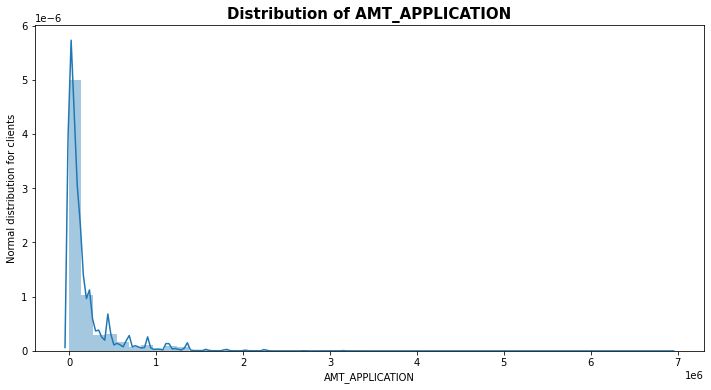

In [54]:
unnivariate_cont('AMT_APPLICATION')

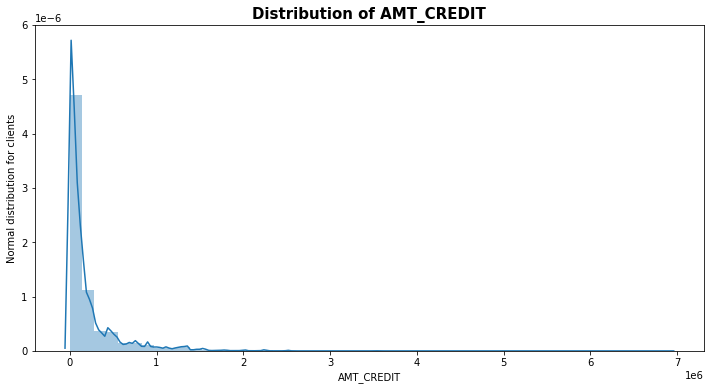

In [55]:
unnivariate_cont('AMT_CREDIT')


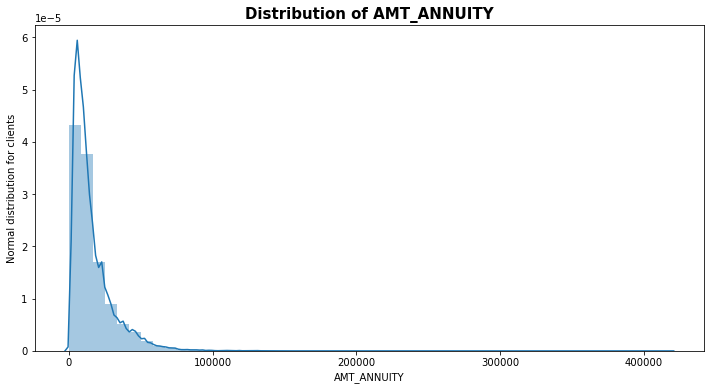

In [56]:
unnivariate_cont('AMT_ANNUITY')


In [57]:
def bivariate_cat_cat(variable,var_hue):
    plt.figure(figsize=(12,6))
    sns.countplot(variable,hue=var_hue, data=previous, palette= 'bright', order= previous[variable].value_counts().index, hue_order=previous[var_hue].value_counts().index)
    plt.title('Analysis of '+ '%s' %variable , weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Clients')
    plt.show()

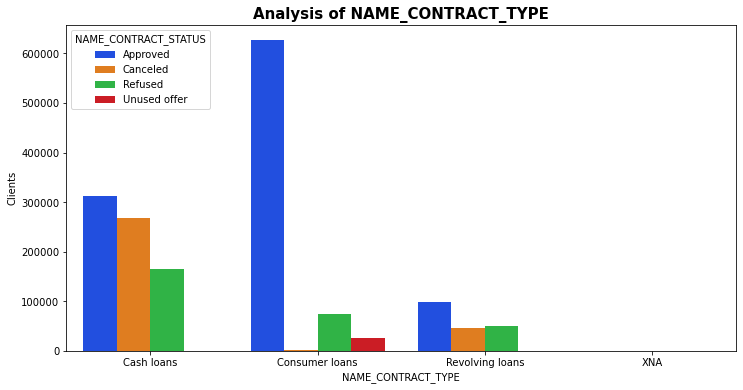

In [58]:
bivariate_cat_cat('NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS')

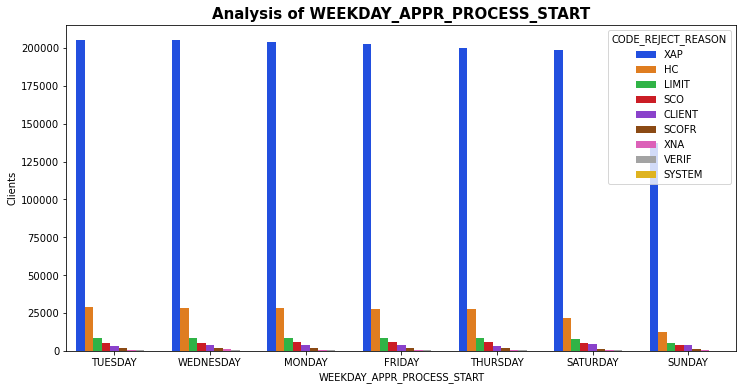

In [59]:
bivariate_cat_cat('WEEKDAY_APPR_PROCESS_START','CODE_REJECT_REASON')


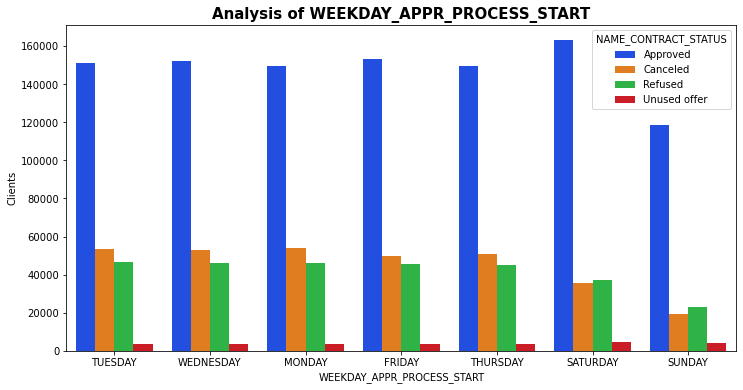

In [60]:
bivariate_cat_cat('WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS')

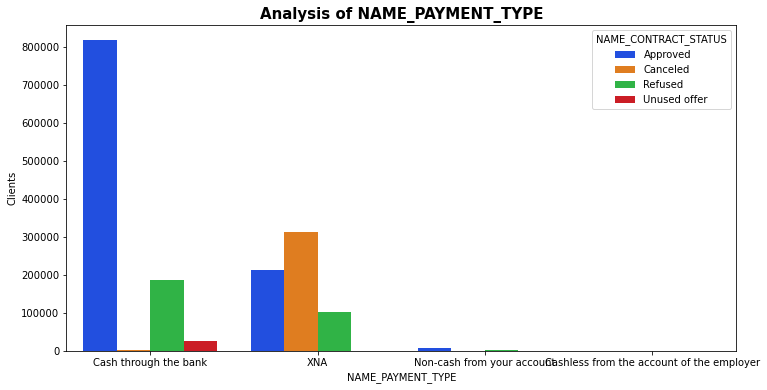

In [61]:
bivariate_cat_cat('NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

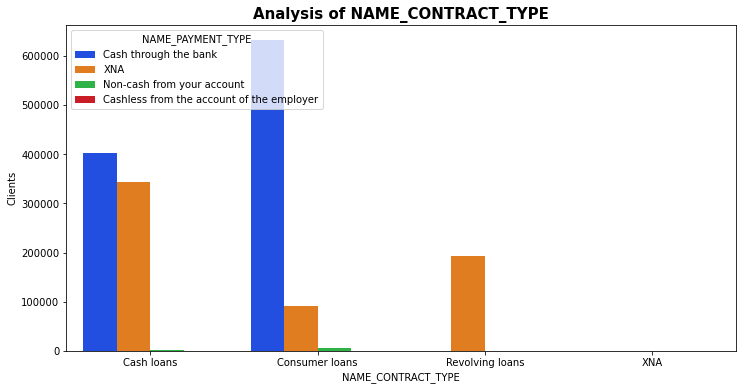

In [62]:
bivariate_cat_cat('NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE')

In [63]:
def bivariate_cat_cont(var_cat,var_cont):
    plt.figure(figsize=(13,8))
    sns.boxplot(x=var_cat,y=var_cont, data=previous, palette='bright', order= previous[var_cat].value_counts().index)
    plt.title('Analysis of '+ '%s' %var_cat, weight='heavy', fontsize=15)
    plt.xlabel(var_cat)
    plt.ylabel('%s' %var_cont+' for defaulters')
    plt.show()

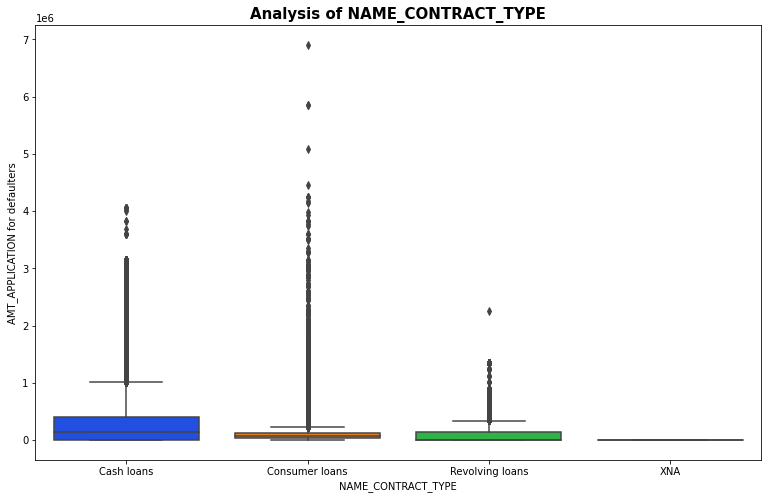

In [64]:
bivariate_cat_cont('NAME_CONTRACT_TYPE','AMT_APPLICATION')

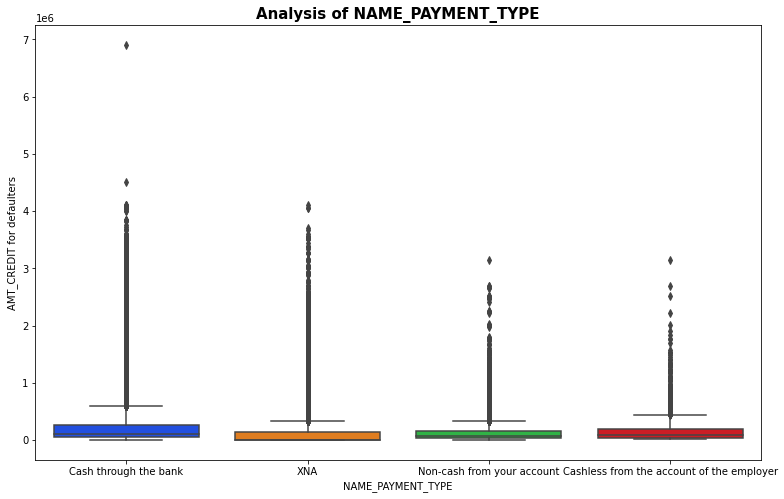

In [65]:
bivariate_cat_cont('NAME_PAYMENT_TYPE','AMT_CREDIT')

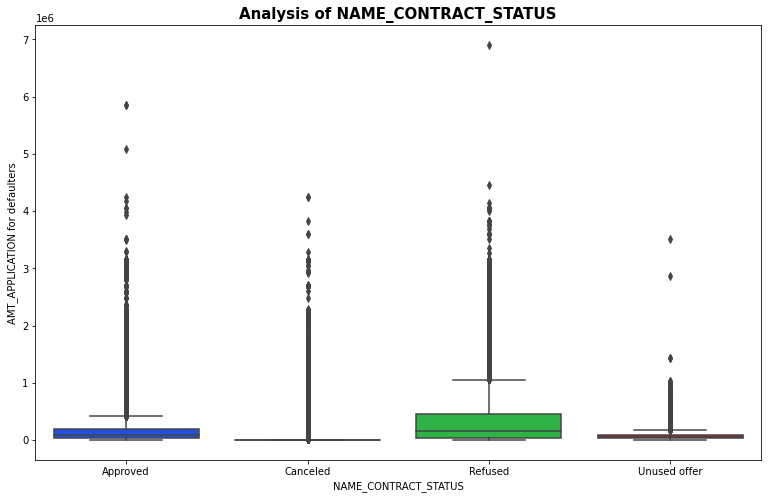

In [66]:
bivariate_cat_cont('NAME_CONTRACT_STATUS','AMT_APPLICATION')

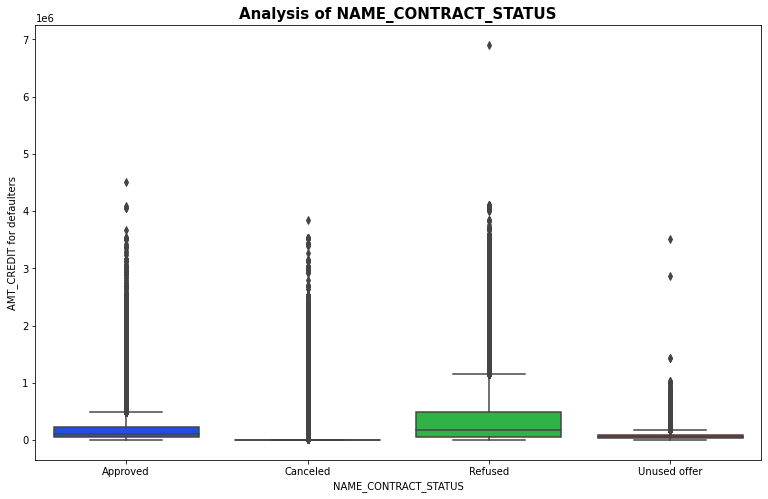

In [67]:
bivariate_cat_cont('NAME_CONTRACT_STATUS','AMT_CREDIT')

In [68]:
def bivariate_cont_cont(var_cont1,var_cont2):   
    plt.figure(figsize=(13,7))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=previous, palette='bright')
    plt.title('Analysis of '+ '%s' %var_cont1, weight='heavy', fontsize=15)
    plt.ylabel('Analysis of '+ '%s' %var_cont2)
    xIQR=1.5*(previous[var_cont1].quantile(.75)-previous[var_cont1].quantile(.25))
    xlowerlim=previous[var_cont1].quantile(.25)-xIQR
    xupperlim=previous[var_cont1].quantile(.75)+xIQR
    yIQR=1.5*(previous[var_cont2].quantile(.75)-previous[var_cont2].quantile(.25))
    ylowerlim=previous[var_cont2].quantile(.25)-yIQR
    yupperlim=previous[var_cont2].quantile(.75)+yIQR
    plt.show()


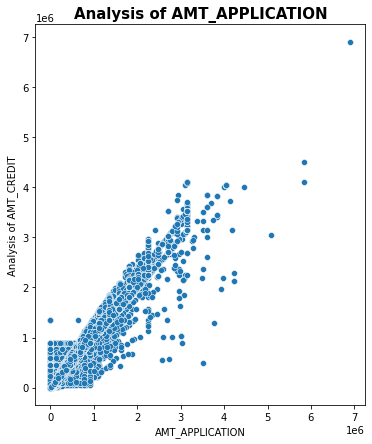

In [69]:
bivariate_cont_cont('AMT_APPLICATION','AMT_CREDIT')

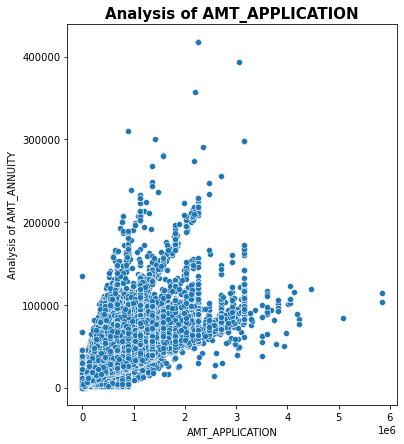

In [70]:
bivariate_cont_cont('AMT_APPLICATION','AMT_ANNUITY')

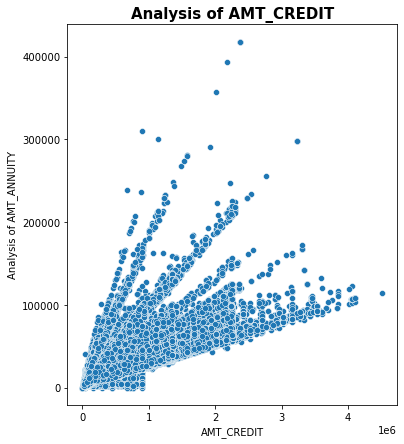

In [71]:
bivariate_cont_cont('AMT_CREDIT','AMT_ANNUITY')

In [72]:
def corr_heatmap(variable):
    plt.figure(figsize=(13,9))
    corr_lation = variable.corr()
    masking=np.triu(np.ones(corr_lation.shape)).astype(np.bool)
    sns.heatmap(corr_lation,annot=True,mask=masking,linewidths=.10,cmap="Spectral")
    plt.show()
    #Steps to obtain the top correlation.
    indices = np.where(corr_lation > -1)
    indices = [(corr_lation.index[x], corr_lation.columns[y],abs(corr_lation.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    all=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Ten Correlations are:")
    for i in range(0,6):
        print('%d. '%(i+1)+all[i][0]+' and '+all[i][1])

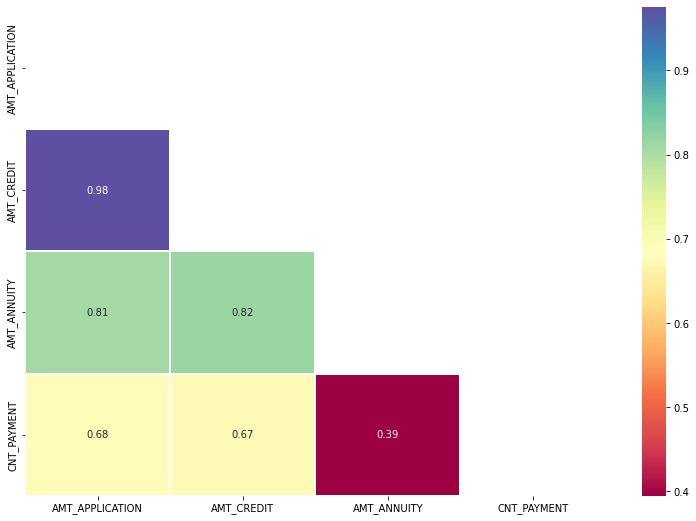

Ten Correlations are:
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_CREDIT and AMT_ANNUITY
3. AMT_APPLICATION and AMT_ANNUITY
4. AMT_APPLICATION and CNT_PAYMENT
5. AMT_CREDIT and CNT_PAYMENT
6. AMT_ANNUITY and CNT_PAYMENT


In [73]:
corr_heatmap(previous[['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])

In [74]:
X = pd.DataFrame(previous[['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE',
                           'NAME_PAYMENT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'CODE_REJECT_REASON'
                          ]])
Y = previous['NAME_CONTRACT_STATUS']

In [75]:
obj_cols = []
col = X.columns
for i in col:
    if X[i].dtype == 'object':
        obj_cols.append(i)
print(obj_cols)

['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON']


In [76]:
X = pd.get_dummies(X, columns= obj_cols)


In [77]:
X.columns

Index(['AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Consumer loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_TYPE_XNA',
       'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
       'NAME_CASH_LOAN_PURPOSE_Business development',
       'NAME_CASH_LOAN_PURPOSE_Buying a garage',
       'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
       'NAME_CASH_LOAN_PURPOSE_Buying a home',
       'NAME_CASH_LOAN_PURPOSE_Buying a new car',
       'NAME_CASH_LOAN_PURPOSE_Buying a used car',
       'NAME_CASH_LOAN_PURPOSE_Car repairs',
       'NAME_CASH_LOAN_PURPOSE_Education',
       'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
       'NAME_CASH_LOAN_PURPOSE_Furniture',
       'NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
       'NAME_CASH_LOAN_PURPOSE_Hobby', 'NAME_CASH_LOAN_PURPOSE_Journey',
       'NAME_CASH_LOAN_PURPOSE_Medicine',
       'NAME_CASH_LOAN_PURPOSE_Money for a third person',
       'NAME_CASH_LOA

In [78]:
Y.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [79]:
previous['NAME_CONTRACT_STATUS'].replace("Canceled","Refused", inplace=True)
previous['NAME_CONTRACT_STATUS'].replace("Unused offer", "Refused", inplace=True)
previous['NAME_CONTRACT_STATUS'].value_counts()
X['AMT_CREDIT'] = X['AMT_CREDIT'].fillna(X['AMT_CREDIT'].mean())
Y.value_counts()

Approved    1036781
Refused      633433
Name: NAME_CONTRACT_STATUS, dtype: int64

In [80]:
import imblearn


In [81]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(Y))
overs = RandomOverSampler(sampling_strategy='minority')
X_1, y_1 = overs.fit_resample(X, Y)
print(Counter(y_1))

Counter({'Approved': 1036781, 'Refused': 633433})
Counter({'Approved': 1036781, 'Refused': 1036781})


In [50]:
y_1.isnull().sum()

0

In [51]:
y_1.value_counts()

Approved    1036781
Refused     1036781
Name: NAME_CONTRACT_STATUS, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [53]:
yprediction = logistic.predict(X_test)
print('accuracy on testing dataset: {:.3f}'.format(logistic.score(X_test, y_test)))

accuracy on testing dataset: 0.708


In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, yprediction)
print(confusion)

[[296093  14995]
 [166875 144106]]


In [55]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, yprediction))

              precision    recall  f1-score   support

    Approved       0.64      0.95      0.77    311088
     Refused       0.91      0.46      0.61    310981

    accuracy                           0.71    622069
   macro avg       0.77      0.71      0.69    622069
weighted avg       0.77      0.71      0.69    622069



In [56]:
from sklearn.tree import DecisionTreeClassifier
nb = DecisionTreeClassifier()
nb.fit(X_train, y_train)
# X_test_dtm class predictions are conducted
yprediction = nb.predict(X_test)

# class prediction accuracies are calculated
from sklearn import metrics
print(metrics.accuracy_score(y_test, yprediction))

# confusion matrix is bulit
print(metrics.confusion_matrix(y_test, yprediction))

0.9916070403765499
[[309194   1894]
 [  3327 307654]]


In [57]:
#Gaussian Naive Bayes classifier is trained
from sklearn.naive_bayes import GaussianNB
# Start the model
gaussian = GaussianNB()
# fit the model
gaussian.fit(X_train, y_train)
yprediction = gaussian.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy Score: {0:0.2f}'. format(accuracy_score(y_test, yprediction)))

Model Accuracy Score: 0.51


In [58]:
y_predtrain = gaussian.predict(X_train)
print('Training set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_predtrain)))
# Training and Testing scores are printed
print('Training-set-score: {:.2f}'.format(gaussian.score(X_train, y_train)))
print('Test-set-score: {:.2f}'.format(gaussian.score(X_test, y_test)))
# check class distribution in test set
y_test.value_counts()

Training set accuracy score: 0.51
Training-set-score: 0.51
Test-set-score: 0.51


Approved    311088
Refused     310981
Name: NAME_CONTRACT_STATUS, dtype: int64

In [59]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_test, yprediction)
print('Confusion matrix\n\n', confusionmatrix)

Confusion matrix

 [[285040  26048]
 [277136  33845]]


<AxesSubplot:>

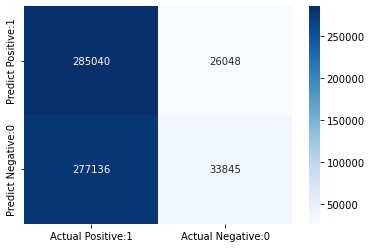

In [60]:
# seaborn heatmaps are used to visualise the confusion matrix
confusionmatrix_matrix = pd.DataFrame(data=confusionmatrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusionmatrix_matrix, annot=True, fmt='d', cmap='Blues')

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yprediction))

              precision    recall  f1-score   support

    Approved       0.51      0.92      0.65    311088
     Refused       0.57      0.11      0.18    310981

    accuracy                           0.51    622069
   macro avg       0.54      0.51      0.42    622069
weighted avg       0.54      0.51      0.42    622069



In [62]:
TrueP = confusionmatrix[0,0]
TrueN = confusionmatrix[1,1]
FalseP = confusionmatrix[0,1]
FalseN = confusionmatrix[1,0]

In [63]:

class_error = (FalseP + FalseN) / float(TrueP + TrueN + FalseP + FalseN)
print('classification error : {0:0.2f}'.format(class_error))


class_accuracy = (TrueP + TrueN) / float(TrueP + TrueN + FalseP + FalseN)
print('classification accuracy : {0:0.2f}'.format(class_accuracy))


prec = TrueP / float(TrueP + FalseP)
print('precision : {0:0.2f}'.format(prec))

re = TrueP / float(TrueP + FalseN)
print('Recall : {0:0.2f}'.format(re))

false_positive = FalseP / float(FalseP + TrueN)
print('false positive rate : {0:0.2f}'.format(false_positive))

true_positive = TrueP / float(TrueP + FalseN)
print('true positive rate : {0:0.2f}'.format(true_positive))

spec = TrueN / (TrueN + FalseP)
print('specificity : {0:0.2f}'.format(spec))

classification error : 0.49
classification accuracy : 0.51
precision : 0.92
Recall : 0.51
false positive rate : 0.43
true positive rate : 0.51
specificity : 0.57


In [64]:
# 10-Fold Cross Validation is applied 
from sklearn.model_selection import cross_val_score
sc = cross_val_score(gaussian, X_train, y_train, cv = 10, scoring='accuracy')
print('cross-validation-scores:{}'.format(sc))
# cross-validation score average is calculated
print('Average cross-validation score: {:.2f}'.format(sc.mean()))

cross-validation-scores:[0.51302101 0.51313813 0.51254564 0.51117817 0.51236316 0.5120738
 0.51157776 0.51206002 0.5119429  0.51176377]
Average cross-validation score: 0.51


In [65]:
y_1.head()

0    Approved
1    Approved
2    Approved
3    Approved
4     Refused
Name: NAME_CONTRACT_STATUS, dtype: object

In [66]:
y_1 = y_1.map({'Approved':1, 'Refused':0})
y_1.head()

0    1
1    1
2    1
3    1
4    0
Name: NAME_CONTRACT_STATUS, dtype: int64

In [67]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
boost = XGBClassifier()
xtrain, xtest, ytrain, ytest=train_test_split(X_1, y_1, test_size=0.30)
label = LabelEncoder()
ytrain = label.fit_transform(ytrain)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
boost.fit(xtrain, ytrain)
sc = cross_val_score(boost, xtrain, ytrain, cv=5)
print("mean cross-validation-score: %.2f" % sc.mean())
k = KFold(n_splits=10, shuffle=True)
k_cv = cross_val_score(boost, xtrain, ytrain, cv=k )
print("k-fold cv-average-score: %.2f" % k_cv.mean())
yprediction = boost.predict(xtest)
print('model-accuracy-score: {0:0.2f}'. format(accuracy_score(ytest, yprediction)))
print(classification_report(ytest, yprediction))
confusionmatrix = confusion_matrix(ytest,yprediction) 
print(confusionmatrix)


mean cross-validation-score: 0.99
k-fold cv-average-score: 0.99
model-accuracy-score: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    311025
           1       0.99      1.00      0.99    311044

    accuracy                           0.99    622069
   macro avg       0.99      0.99      0.99    622069
weighted avg       0.99      0.99      0.99    622069

[[307246   3779]
 [  1354 309690]]
